In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#talking about function transformation(helpful when if any useful impformation presrent in outlier)

In [26]:
df=pd.read_csv(r"C:\Users\USER\Downloads\Desktop\ML\dataset\loan.csv")
df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


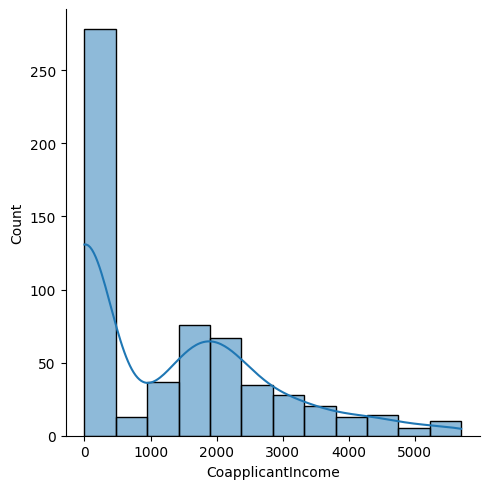

In [19]:
sns.displot(df['CoapplicantIncome'],kde=True)
plt.show()

In [7]:
q1=df["CoapplicantIncome"].quantile(0.25)
q3=df["CoapplicantIncome"].quantile(0.75)

In [10]:
iqr=q3-q1

In [11]:
min=q1-1.5*iqr
max=q3+1.5*iqr

In [12]:
min,max

(-3445.875, 5743.125)

In [23]:
df=df[df["CoapplicantIncome"]<=max]

In [20]:
from sklearn.preprocessing import FunctionTransformer


In [29]:
ft=FunctionTransformer(func=np.log1p)

In [30]:
ft.fit(df["CoapplicantIncome"])

FunctionTransformer(func=<ufunc 'log1p'>)

In [35]:
df['CoapplicantIncome_ft'] = ft.transform(df[['CoapplicantIncome']])

In [38]:
def transform_coapplicantincome(x):
    return x**2

ft = FunctionTransformer(transform_coapplicantincome)

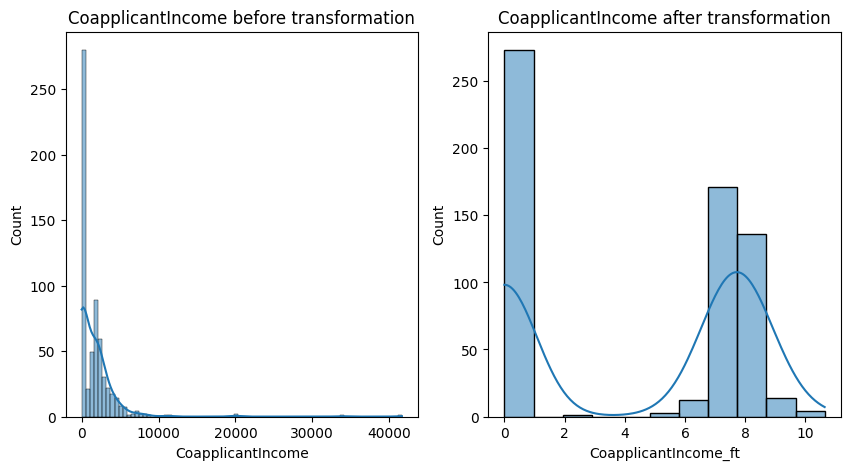

In [40]:

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("CoapplicantIncome before transformation")
sns.histplot(data=df, x="CoapplicantIncome", kde=True)

plt.subplot(1,2,2)
plt.title("CoapplicantIncome after transformation")
sns.histplot(data=df, x="CoapplicantIncome_ft", kde=True)

plt.show()

In [41]:
from sklearn.preprocessing import FunctionTransformer
ft1=FunctionTransformer(func=lambda x: x**2)

In [42]:
ft1.fit(df["CoapplicantIncome"])

FunctionTransformer(func=<function <lambda> at 0x0000024A452A2A20>)

In [44]:
df['CoapplicantIncome_ft'] = ft1.transform(df["CoapplicantIncome"])

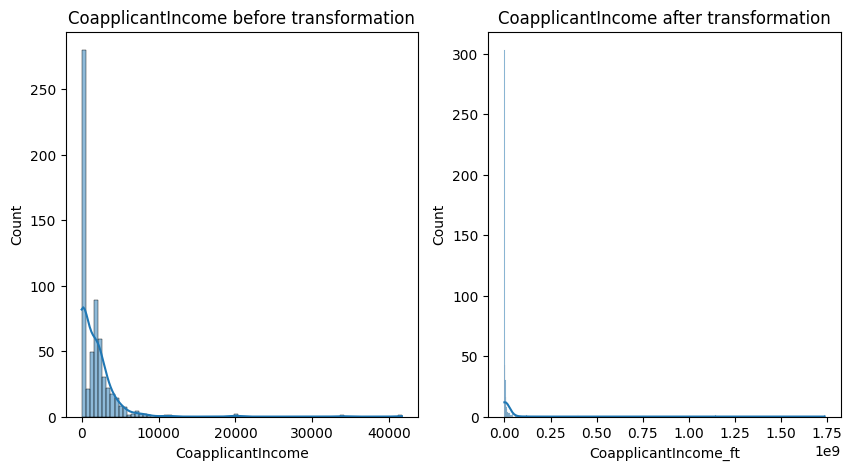

In [45]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("CoapplicantIncome before transformation")
sns.histplot(data=df, x="CoapplicantIncome", kde=True)

plt.subplot(1,2,2)
plt.title("CoapplicantIncome after transformation")
sns.histplot(data=df, x="CoapplicantIncome_ft", kde=True)

plt.show()